<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Common-Activation-Functions" data-toc-modified-id="Common-Activation-Functions-1">Common Activation Functions</a></span></li><li><span><a href="#A-Simple-neural-network" data-toc-modified-id="A-Simple-neural-network-2">A Simple neural network</a></span><ul class="toc-item"><li><span><a href="#Problem-Dataset-Simulation" data-toc-modified-id="Problem-Dataset-Simulation-2.1">Problem Dataset Simulation</a></span></li></ul></li><li><span><a href="#ANN-Training-functions" data-toc-modified-id="ANN-Training-functions-3">ANN Training functions</a></span></li><li><span><a href="#Visualize-Classification-Learning" data-toc-modified-id="Visualize-Classification-Learning-4">Visualize Classification Learning</a></span></li><li><span><a href="#Run-Classification-Training-Simulation-and-Visualize/Animate" data-toc-modified-id="Run-Classification-Training-Simulation-and-Visualize/Animate-5">Run Classification Training Simulation and Visualize/Animate</a></span></li><li><span><a href="#Visualize-Regression-Learning" data-toc-modified-id="Visualize-Regression-Learning-6">Visualize Regression Learning</a></span></li><li><span><a href="#Run-Regression-Training-Simulation-and-Visualize/Animate" data-toc-modified-id="Run-Regression-Training-Simulation-and-Visualize/Animate-7">Run Regression Training Simulation and Visualize/Animate</a></span></li></ul></div>

## Common Activation Functions

In [1]:
%pylab inline
from collections import OrderedDict

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Common activation functions
g_linear = lambda z: z
g_sigmoid = lambda z: 1./(1. + np.exp(-z))
g_tanh = lambda z: np.tanh(z)
   
# Gradients    
g_prime_linear = lambda z: np.ones(len(z))
g_prime_sigmoid = lambda z: 1./(1 + np.exp(-z)) * (1 - 1./(1 + np.exp(-z)))
g_prime_tanh = lambda z: 1 - np.tanh(z) ** 2

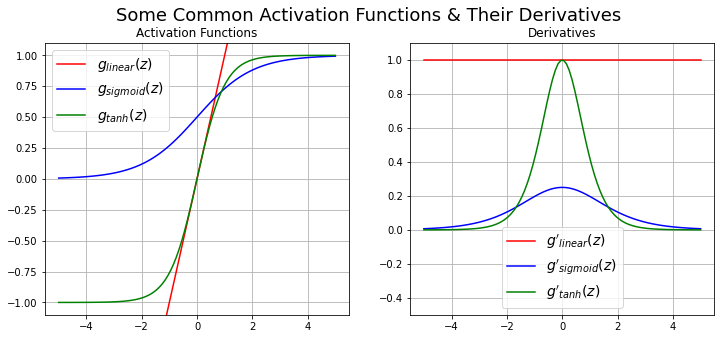

In [3]:
activation_functions = OrderedDict(
    [
        ("linear", (g_linear, g_prime_linear, 'red')),
        ("sigmoid", (g_sigmoid, g_prime_sigmoid, 'blue')),
        ("tanh", (g_tanh, g_prime_tanh, 'green')),
    ]
)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
xs = np.linspace(-5, 5, 100)
for name, params in activation_functions.items():
    # Activation functions
    plt.sca(axs[0])
    plt.plot(xs, params[0](xs), color=params[2], label=f"$g_{{{name}}}(z)$")
    plt.ylim([-1.1, 1.1])
    plt.grid()
    plt.legend(fontsize=14)
    plt.title('Activation Functions')
    
    # Derivatives
    plt.sca(axs[1])
    plt.plot(xs, params[1](xs), color=params[2], label=f"$g\'_{{{name}}}(z)$")
    plt.ylim([-.5, 1.1])
    plt.grid()
    plt.legend(fontsize=14)
    plt.title('Derivatives')
plt.suptitle("Some Common Activation Functions & Their Derivatives", fontsize=18);
    
plt.savefig('/tmp/common_activation_functions.png', dpi=300)

## A Simple neural network

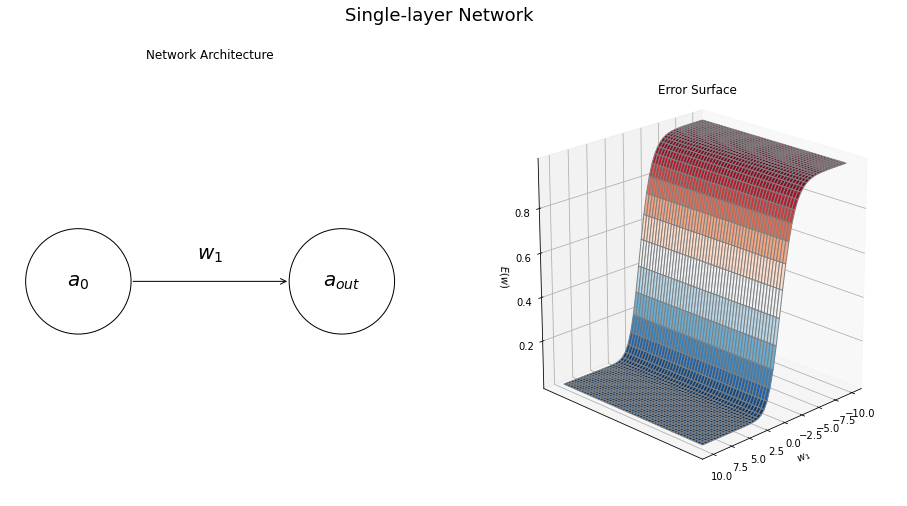

In [4]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches

# Sigmoid activation functions
g = g_sigmoid
def error_function(prediction, target):
    """Squared error function (f(x) - y)**2"""
    return (prediction - target)**2

# Grid of allowed parameter values
grid_size = 50
parameter_range = np.linspace(-10, 10, grid_size)
w1, w2 = np.meshgrid(parameter_range, parameter_range)

target_value = 1

# single layer ANN
def single_layer_network_predict(w1, target_value):
    return g(w1 * target_value)

single_layer_network_output = single_layer_network_predict(w1, target_value)
single_layer_network_error = error_function(single_layer_network_output, target_value)

# Plot network diagram
# fig, axs  = plt.subplots(1, 2, figsize=(10, 5))
# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=(16, 8))

ax = fig.add_subplot(1, 2, 1)
input_node = mpatches.Circle((0, .5), 0.1, facecolor='white', edgecolor='black')
output_node = mpatches.Circle((.5, .5), 0.1, facecolor='white', edgecolor='black')
ax.add_patch(input_node)
ax.add_patch(output_node)
ax.text(0, .5, '$a_0$', fontsize=20, ha='center', va='center')
ax.text(.5, .5, '$a_{out}$', fontsize=20, ha='center', va='center')
ax.text(.25, .55, '$w_1$', fontsize=20, ha='center', va='center')

ax.annotate(
    '', 
    (.4, .5),
    (.1, .5),
    size=14,
    va="center",
    ha="center",
    arrowprops=dict(
        arrowstyle='->',
        fc="k", ec="k"
    ),
   )

plt.xlim([-.25, 1.25])
plt.ylim([0.2, .8])
plt.axis('equal')
plt.axis('off');
plt.title("Network Architecture")

# Plot Error Surface
ERROR_COLORMAP = 'RdBu_r'
edge_color = 'gray'
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_surface(w1, w2, single_layer_network_error, cmap=ERROR_COLORMAP, edgecolor=edge_color)
plt.yticks([])
ax.view_init(20, 45)
ax.set_xlabel('$w_1$')
ax.set_zlabel('$E(w)$')
plt.title("Error Surface")
plt.suptitle('Single-layer Network', fontsize=18)

plt.savefig('/tmp/single-layer-ann-error-surface.png', bbox_inches='tight', dpi=300)

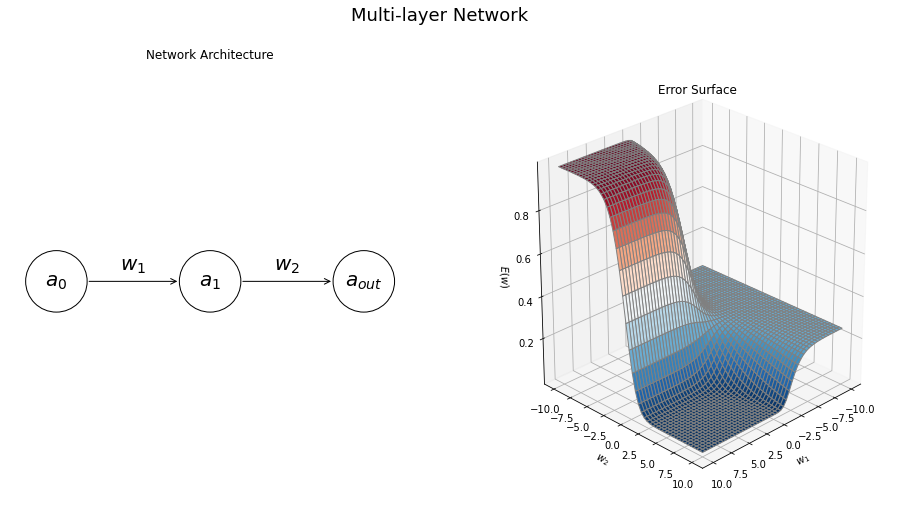

In [5]:
def two_layer_network_predict(w1, w2, target_value):
    return g(w2 * g(w1 * target_value))

two_layer_network_output = two_layer_network_predict(w1, w2, target_value)
two_layer_network_error = error_function(two_layer_network_output, target_value)


# Plot network diagram
fig = plt.figure(figsize=(16, 8))

ax = fig.add_subplot(1, 2, 1)
input_node = mpatches.Circle((0, .5), 0.1, facecolor='white', edgecolor='black')
hidden_node = mpatches.Circle((.5, .5), 0.1, facecolor='white', edgecolor='black')
output_node = mpatches.Circle((1, .5), 0.1, facecolor='white', edgecolor='black')
ax.add_patch(input_node)
ax.add_patch(hidden_node)
ax.add_patch(output_node)
ax.text(0.0, .5, '$a_0$', fontsize=20, ha='center', va='center')
ax.text(0.5, .5, '$a_1$', fontsize=20, ha='center', va='center')
ax.text(1.0, .5, '$a_{out}$', fontsize=20, ha='center', va='center')

# hidden layer weights
ax.annotate(
    '', 
    (.4, .5),
    (.1, .5),
    size=14,
    va="center",
    ha="center",
    arrowprops=dict(
        arrowstyle='->',
        fc="k", ec="k"
    ),
   )
ax.text(.25, .55, '$w_1$', fontsize=20, ha='center', va='center')

# output layer weights
ax.annotate(
    '', 
    (.6, .5),
    (.9, .5),
    size=14,
    va="center",
    ha="center",
    arrowprops=dict(
        arrowstyle='<-',
        fc="k", ec="k"
    ),
   )
ax.text(.75, .55, '$w_2$', fontsize=20, ha='center', va='center')

plt.xlim([-.25, 1.25])
plt.ylim([0.2, .8])
plt.axis('equal')
plt.axis('off');
plt.title("Network Architecture")

# Plot Error Surface
ERROR_COLORMAP = 'RdBu_r'
edge_color = 'gray'
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_surface(w1, w2, two_layer_network_error, cmap=ERROR_COLORMAP, edgecolor=edge_color)
ax.view_init(25, 45)
ax.set_xlabel('$w_1$')
ax.set_ylabel('$w_2$')
ax.set_zlabel('$E(w)$')
plt.title("Error Surface")

plt.suptitle('Multi-layer Network', fontsize=18)

plt.savefig('/tmp/multi-layer-ann-error-surface.png', bbox_inches='tight', dpi=300)

### Problem Dataset Simulation
Below we setup various datasets to demonstrate ANN training

In [6]:
def generate_classification_data(problem_type, n_obs_per_class=30):
    """Generates training data for all demos
    """
    np.random.seed(123)
    
    truth_table = np.array(
        [
            [0, 0],
            [0, 1],
            [1, 0],
            [1, 1]
        ]
    )

    ring_table = np.vstack(
        [
            truth_table,
            np.array(
                [
                    [.5, .5], 
                    [1., .5],
                    [0., .5],
                    [.5, 0.],
                    [.5, 1.]
                ]
            )
        ]
    )
    ring_classes = [1., 1., 1., 1., 0., 1., 1., 1., 1.];


    problem_classes = {
        'AND': np.logical_and(truth_table[:,0], truth_table[:, 1]) * 1.,
        'OR': np.logical_or(truth_table[:,0], truth_table[:, 1]) * 1.,
        'XOR': np.logical_xor(truth_table[:,0], truth_table[:, 1]) * 1.,
        'RING': ring_classes
    }
    
    if problem_type in ('AND', 'OR', 'XOR'):
        observations = np.tile(truth_table, (n_obs_per_class, 1)) + .15 * np.random.randn(n_obs_per_class * 4, 2)
        obs_classes = np.tile(problem_classes[problem_type], n_obs_per_class)
    else:
        observations = np.tile(ring_table, (n_obs_per_class, 1)) + .15 * np.random.randn(n_obs_per_class * 9, 2)
        obs_classes = np.tile(problem_classes[problem_type], n_obs_per_class)
        
    # Permute data
    permutation_idx = np.random.permutation(np.arange(len(obs_classes)))
    obs_classes = obs_classes[permutation_idx]
    observations = observations[permutation_idx]
    obs_x = [obs[0] for obs in observations]
    obs_y = [obs[1] for obs in observations]
    return obs_x, obs_y, obs_classes

def generate_regression_data(problem_type='SIN', n_obs=100):
    np.random.seed(123)
    xx = np.linspace(-5, 5, n_obs);
    if problem_type == 'SIN':
        f = lambda x: 2.5 + np.sin(x)
    elif problem_type == 'ABS':
        f = lambda x: abs(x)
    
    yy = f(xx) + np.random.randn(*xx.shape)*.5
    perm_idx = np.random.permutation(np.arange(n_obs))
    return xx[perm_idx, None], yy[perm_idx]


## ANN Training functions

In [44]:
from copy import copy

def initialize_network_parameters(n_input_units, n_hidden_units=0, n_output_units=1):
    """Generate weights and bias parameters based on defined network architecture"""
    w1_size = n_hidden_units if n_hidden_units > 0 else n_output_units
    # Weights
    weights = dict()
    weight_gradients = dict()
    
    weights['w_1'] = np.random.rand(n_input_units, w1_size) - .5
    weight_gradients['w_1'] = np.zeros_like(weights['w_1'])

    if n_hidden_units > 0:
        weights['w_2'] = np.random.rand(n_hidden_units, n_output_units) - .5
        weight_gradients['w_2'] = np.zeros_like(weights['w_2'])
    
    # Biases
    biases = dict()
    bias_gradients = dict()
    biases['b_1'] = np.random.rand(w1_size) - .5
    bias_gradients['b_1'] = np.zeros_like(biases['b_1'])
    
    if n_hidden_units > 0:
        biases['b_2'] = np.random.rand(n_output_units) - .5
        bias_gradients['b_2'] = np.zeros_like(biases['b_2'])
        
    return weights, biases, weight_gradients, bias_gradients

def step_I_forwardprop(network_input, weights, biases, g_activation):
    if 'w_2' in weights:  # multi-layer network
        z_hidden = network_input @ weights['w_1'] + biases['b_1']
        a_hidden = g_activation['g_1'](z_hidden)
        z_output = a_hidden @ weights['w_2'] + biases['b_2']
    else:  # single-layer network
        z_hidden = np.array([])
        a_hidden = np.array([])
        z_output = network_input @ weights['w_1'] + biases['b_1']
    
    a_output = g_activation['g_out'](z_output) # Network prediction
    return a_output, z_output, a_hidden, z_hidden

def step_II_backprop(target, a_output, z_output, z_hidden, weights, g_activation_prime):
    ## Calculate error function derivative given input/output/params
    delta_output = g_activation_prime['g_out'](z_output) * (a_output - target)
    
    ## Calculate any error contributions from hidden layers nodes
    if 'w_2' in weights:  # multi-layer network
        delta_hidden = g_activation_prime['g_1'](z_hidden) * (delta_output @ weights['w_2'].T)
    else:
        delta_hidden = np.array([])
    return delta_output, delta_hidden

def step_III_gradient_calculation(delta_output, delta_hidden, a_hidden, network_input, weight_gradients, bias_gradients):
    if 'w_2' in weight_gradients:  # multi-layer network
        weight_gradients['w_2'] = a_hidden.T * delta_output
        bias_gradients['b_2'] = delta_output * 1
        weight_gradients['w_1'] = network_input.T * delta_hidden
        bias_gradients['b_1'] = delta_hidden * 1
    else:  # single-layer network
        weight_gradients['w_1'] = network_input.T * delta_output
        bias_gradients['b_1'] = delta_output * 1
    
    return weight_gradients, bias_gradients

def step_IV_update_parameters(weights, biases, weight_gradients, bias_gradients, learning_rate):
    if 'w_2' in weights:  # multi-layer network
        weights['w_2'] = weights['w_2'] - weight_gradients['w_2'] * learning_rate
        biases['b_2'] = biases['b_2'] - bias_gradients['b_2'] * learning_rate

    weights['w_1'] = weights['w_1'] - weight_gradients['w_1'] * learning_rate
    biases['b_1'] = biases['b_1'] - bias_gradients['b_1'] * learning_rate
    return weights, biases

def get_prediction_surface(pred_surface_xy, weights, biases, g_activation):
    """Calculates current prediction surface for classification problem. Used for visualization"""
    prediction_surface = [step_I_forwardprop(xy, weights, biases, g_activation)[0] for xy in pred_surface_xy]
    return np.array(prediction_surface).squeeze().reshape(PREDICTION_SURFACE_RESOLUTION, PREDICTION_SURFACE_RESOLUTION)

def get_prediction_series(pred_x, weights, biases, g_activation):
    """Calculates current prediction series for classification problem. Used for visualization"""
    return step_I_forwardprop(pred_x[:,None], weights, biases, g_activation)[0]

def run_ann_training_simulation(
    problem_type='AND',
    n_hidden_units=0,
    n_iterations=100,
    n_observations=50,
    learning_rate=3
):
    """Simulate ANN training on one of the following problems:
    
    Binary Classification:
        "AND": noisy binary logical AND data distrubted as 2D datapoints
        "OR": noisy binary logical OR data distrubted as 2D datapoints
        "XOR": noisy binary logical XOR data distrubted as 2D datapoints
        "RING": data are a mode of one binary class surronded by a ring of the other
    Regression (2D)
        "SIN": data are noisy observations around the sin function with a slight vertical offset
        "ABS": data are noisy observations around teh absolute value function
        
    Parameters
    ----------
    problem_type : str
        One of the problem types listed above
    n_hidden_units : int
        The number of hidden units in the hidden layer. Zero indicates no hidden layer
    n_iterations : int
        The number of times to run through the training observations
    n_observations : int
        The number of data points or (or dataset replicas for classification) that are used
        in the training dataset
    learning_rage : float
        The initial learning rate (annealing is applied at each iteration)
        
    Returns
    -------
    loss_history : list[float]
        The loss function at each iteration of training
    prediction_history : dict
        Network predictions over the range of the training input. Used for learning visualization.
        Keys are are the iteration number. Values are either prediction surface for classification
        problems, or prediction series for regression
    weights_history : dict
        For each iteration, a snapshot of the state of the parameters. Used for visualizing hidden
        unit states at each iteration
    biases_history : dict
        For each iteration, a snapshot of the state of the biases. Used for visualization. Used for
        visualizing hidden unit states at each iteration
    """

    # Initialize problem data
    if problem_type in ('SIN', 'ABS'):
        observations, targets = generate_regression_data(problem_type, n_observations)
    else:
        obs_x, obs_y, targets = generate_classification_data(problem_type, n_observations)
        observations = np.vstack([obs_x, obs_y]).T
        
    # Initialize model parameters $\theta$
    n_output_dims = 1
    n_obs, n_input_dims = observations.shape
    weights, biases, weight_gradients, bias_gradients = initialize_network_parameters(
        n_input_dims, n_hidden_units, n_output_dims
    )
    
    # Initialize problem-specific activation functions and their derivatives
    g_activation = {}
    g_activation_prime = {}
    if problem_type in ('SIN', 'ABS'):  # regression using linear output (and optional tanh hidden) activations
        g_activation['g_out'], g_activation_prime['g_out'], _ = activation_functions['linear']
        if 'w_2' in weights:
            g_activation['g_1'], g_activation_prime['g_1'], _ = activation_functions['tanh']
    else:  # classification using all sigmoid activations
        g_activation['g_out'], g_activation_prime['g_out'], _ = activation_functions['sigmoid']
        if 'w_2' in weights:
            g_activation['g_1'], g_activation_prime['g_1'], _ = activation_functions['sigmoid']
            
    # Setup for learning history / visualization
    loss_history = []
    prediction_history = {}
    weights_history = {}
    biases_history = {}
    if problem_type in ('SIN', 'ABS'):
        prediction_x = np.linspace(-5, 5, PREDICTION_SURFACE_RESOLUTION)
    else:
        prediction_surface_range = np.linspace(-.5, 1.5, PREDICTION_SURFACE_RESOLUTION)
        prediction_surface_x, prediction_surface_y = np.meshgrid(prediction_surface_range, prediction_surface_range)
        prediction_surface_xy = [(x, y) for x, y in zip(prediction_surface_x.ravel(), prediction_surface_y.ravel())]
    
    # Run the training
    for iteration in range(n_iterations):
        obs_error = []
        for network_input, target in zip(observations, targets):
            network_input = np.atleast_2d(network_input)
            
            # Step I: Forward propagate input signal through the network,
            # collecting activations and hidden states
            a_output, z_output, a_hidden, z_hidden = step_I_forwardprop(
                network_input, weights, biases, g_activation
            )

            # Step II: Backpropagate error signal
            delta_output, delta_hidden = step_II_backprop(
                target, a_output, z_output, z_hidden, weights, g_activation_prime
            )    
            
            # Step III. Calculate Error gradient w.r.t. parameters
            weight_gradients, bias_gradients = step_III_gradient_calculation(
                delta_output, delta_hidden, a_hidden, network_input,
                weight_gradients, bias_gradients
            )
            # Step IV. Update model parameters using gradients
            weights, biases = step_IV_update_parameters(
                weights, biases, weight_gradients, bias_gradients, learning_rate
            )
            
            # Keep track of observation error for loss history
            obs_error.append(error_function(a_output, target))

        # Anneal the learning rate (helps learning)
        learning_rate = learning_rate *.95;
        
        # Keep learning history for visualization
        weights_history[iteration] = copy(weights)
        biases_history[iteration] = copy(biases)
        loss_history.append(sum(obs_error))
        if problem_type in ('SIN', 'ABS'):
            prediction_history[iteration] = get_prediction_series(
                prediction_x, weights, biases, g_activation
            )
        else:
            prediction_history[iteration] = get_prediction_surface(
                prediction_surface_xy, weights, biases, g_activation
            )
    return loss_history, prediction_history, weights_history, biases_history

## Visualize Classification Learning

In [45]:
%matplotlib notebook
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.animation
from matplotlib.animation import FuncAnimation

PREDICTION_SURFACE_RESOLUTION = 20
PREDICTION_COLORMAP = 'spring'


def visualize_classification_learning(problem_type, loss_history, prediction_history, outfile=None):
    fig, axs = plt.subplots(1,2, figsize=(12, 6))

    prediction_surface_range = np.linspace(-.5, 1.5, PREDICTION_SURFACE_RESOLUTION)
    prediction_surface_x, prediction_surface_y = np.meshgrid(prediction_surface_range, prediction_surface_range)

    xx, yy, cls = generate_classification_data(problem_type=problem_type)
    contour = axs[0].contourf(
        prediction_surface_x,
        prediction_surface_y,
        prediction_history[0]
    )
    points = axs[0].scatter(xx, yy, c=cls, cmap='gray_r')
    axs[0].set_title("Prediction Surface")
    line = axs[1].plot(loss_history[0], 'r-', linewidth=2)[0]
    axs[1].set_title("Loss Function")
    suptitle = plt.suptitle("Iteration: 0", fontsize=16)

    def animate(ii):
        plt.suptitle("Iteration: {}".format(ii + 1), fontsize=16)
        axs[0].clear()
        contour = axs[0].contourf(
            prediction_surface_x,
            prediction_surface_y,
            prediction_history[ii]
        )
        axs[0].scatter(xx, yy, c=cls, cmap='gray_r')
        axs[0].set_title("Prediction Surface")
        line = axs[1].plot(loss_history[:ii], 'r-', linewidth=2)
        axs[1].set_title("Loss Function")
        return axs, contour, line

    anim = FuncAnimation(
        fig,
        animate,
        frames=np.arange(len(loss_history)),
        interval=50, repeat=False
    )
    plt.show()
    if outfile:
        # anim.save requires imagemagick library to be installed
        anim.save(outfile, dpi=80, writer='imagemagick')


## Run Classification Training Simulation and Visualize/Animate

<IPython.core.display.Javascript object>


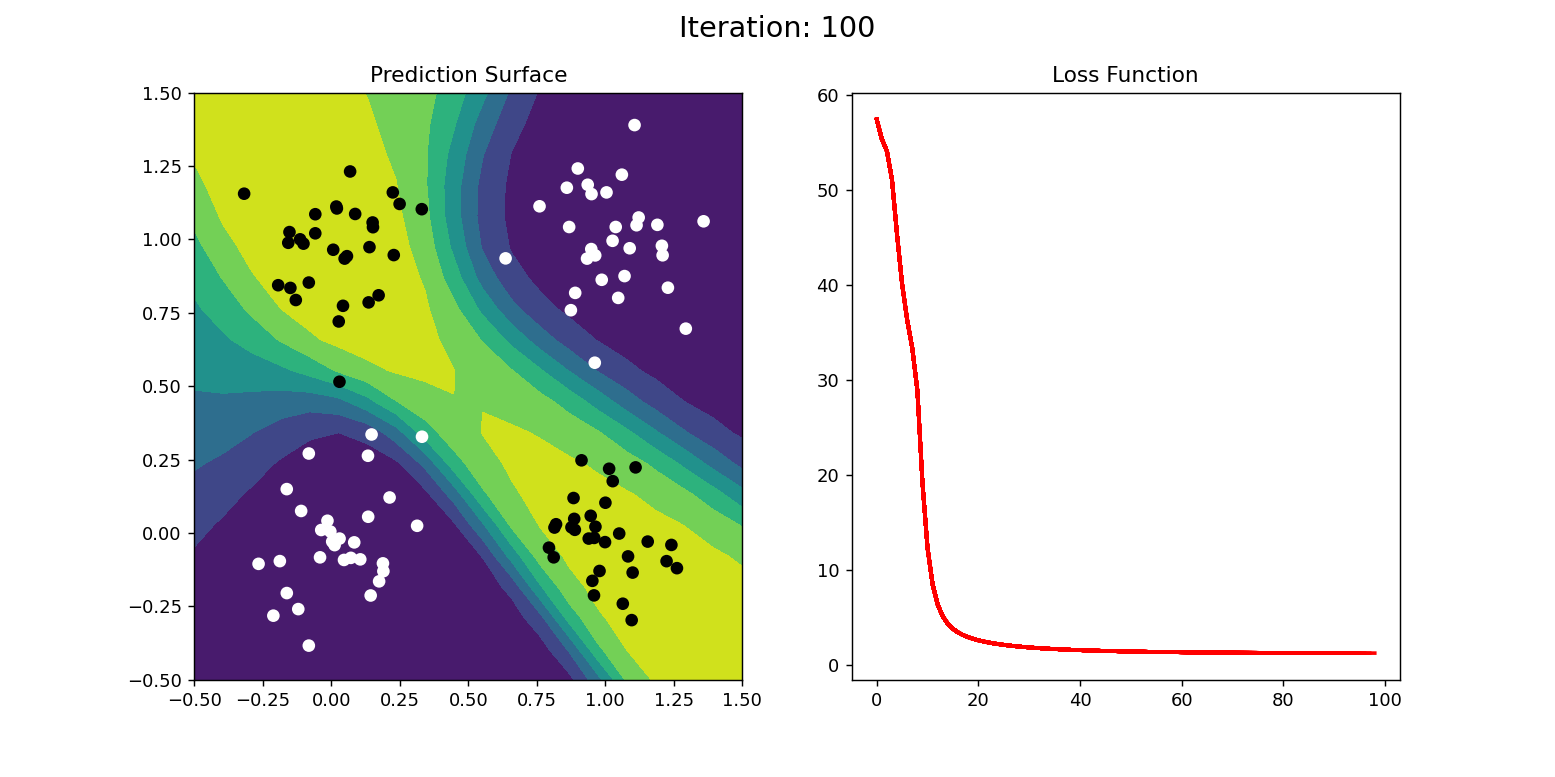

In [46]:
%matplotlib notebook
N_HIDDEN_UNITS = 4
PROBLEM_TYPE = 'XOR'
loss_history, prediction_history, weights_history, biases_history = run_ann_training_simulation(
    problem_type=PROBLEM_TYPE,
    n_hidden_units=N_HIDDEN_UNITS,
    n_iterations=100,
    learning_rate=2,
)

visualize_classification_learning(
    PROBLEM_TYPE,
    loss_history,
    prediction_history,
    outfile=f'/tmp/class-learning-{PROBLEM_TYPE}.gif'.lower()
)
    

In [ ]:
## Loop over various parameters and generate animations
for problem_type in ['AND', 'OR', 'XOR', 'RING']:
    for n_hidden_units in [0, 4, 10]:
        loss_history, prediction_surface_history, _, _ = run_ann_training_simulation(
            problem_type=problem_type,
            n_hidden_units=n_hidden_units,
            n_iterations=100,
            learning_rate=2,
        )
        visualize_classification_learning(
            problem_type,
            loss_history,
            prediction_surface_history,
            outfile='/tmp/class-learning-{}-nhid-{}.gif'.format(problem_type.lower(), n_hidden_units)
        )
    

## Visualize Regression Learning

In [69]:
def visualize_regression_learning(problem_type, loss_history, prediction_history, weights_history, biases_history, outfile=None):
    fig, axs = plt.subplots(1,2, figsize=(12, 8))

    prediction_surface_range = np.linspace(-.5, 1.5, PREDICTION_SURFACE_RESOLUTION)
    prediction_surface_x, prediction_surface_y = np.meshgrid(prediction_surface_range, prediction_surface_range)

    xx, yy = generate_regression_data(problem_type=problem_type, n_obs=len(prediction_history[0]))
    pred_xx = np.linspace(-5, 5, PREDICTION_SURFACE_RESOLUTION)
    
    def get_hidden_unit_predictions(pred_xx, weights, biases):
        return g_tanh(pred_xx[:,None] @ weights['w_1'] + biases['b_1']) * weights['w_2'].T + biases['b_2']
#         return g_tanh(pred_xx[:,None] @ weights['w_1'] + biases['b_1'])
    
    points = axs[0].scatter(xx, yy, marker='o', c='magenta', label='Data')
    ii = 0
    pred_line = axs[0].plot(pred_xx, prediction_history[ii], c='blue', label='Network Prediction')
    hidden_predictions = get_hidden_unit_predictions(pred_xx, weights_history[ii], biases_history[ii])
    
    for hj, hidden_pred in enumerate(hidden_predictions.T):
        axs[0].plot(pred_xx, hidden_pred, '--', label=f'$a_{{{hj}}}^{{(1)}}w_{{{hj}k}} + b_{{k}}$')
        
    axs[0].set_title("Data and Prediction")
    axs[0].legend(loc='upper left')
    loss_line = axs[1].plot(loss_history[:ii], 'r-', linewidth=2)
    axs[1].set_title("Loss Function")
    suptitle = fig.suptitle(f"Iteration: {ii}", fontsize=16)

    def animate(ii):
        suptitle = fig.suptitle("Iteration: {}".format(ii + 1), fontsize=16)
        axs[0].clear()
        points = axs[0].scatter(xx, yy, marker='o', c='magenta', label='Data')
        pred_line = axs[0].plot(pred_xx, prediction_history[ii], c='blue', label='Network Prediction')
        hidden_predictions = get_hidden_unit_predictions(pred_xx, weights_history[ii], biases_history[ii])
        
        for hj, hidden_pred in enumerate(hidden_predictions.T):
            axs[0].plot(pred_xx, hidden_pred, '--', label=f'$a_{{{hj}}}^{{(1)}}w_{{{hj}k}} + b_{{k}}$')
            
        axs[0].set_title("Data and Prediction")
        axs[0].legend(loc='upper left')
        loss_line = axs[1].plot(loss_history[:ii+1], 'r-', linewidth=2)
        axs[1].set_title("Loss Function")
        
        return axs, pred_line, loss_line, suptitle

    anim = FuncAnimation(
        fig,
        animate,
        frames=np.arange(len(loss_history)),
        interval=50, repeat=False
    )
    plt.show()

    if outfile:
        anim.save(outfile, dpi=80, writer='imagemagick')

## Run Regression Training Simulation and Visualize/Animate

<IPython.core.display.Javascript object>


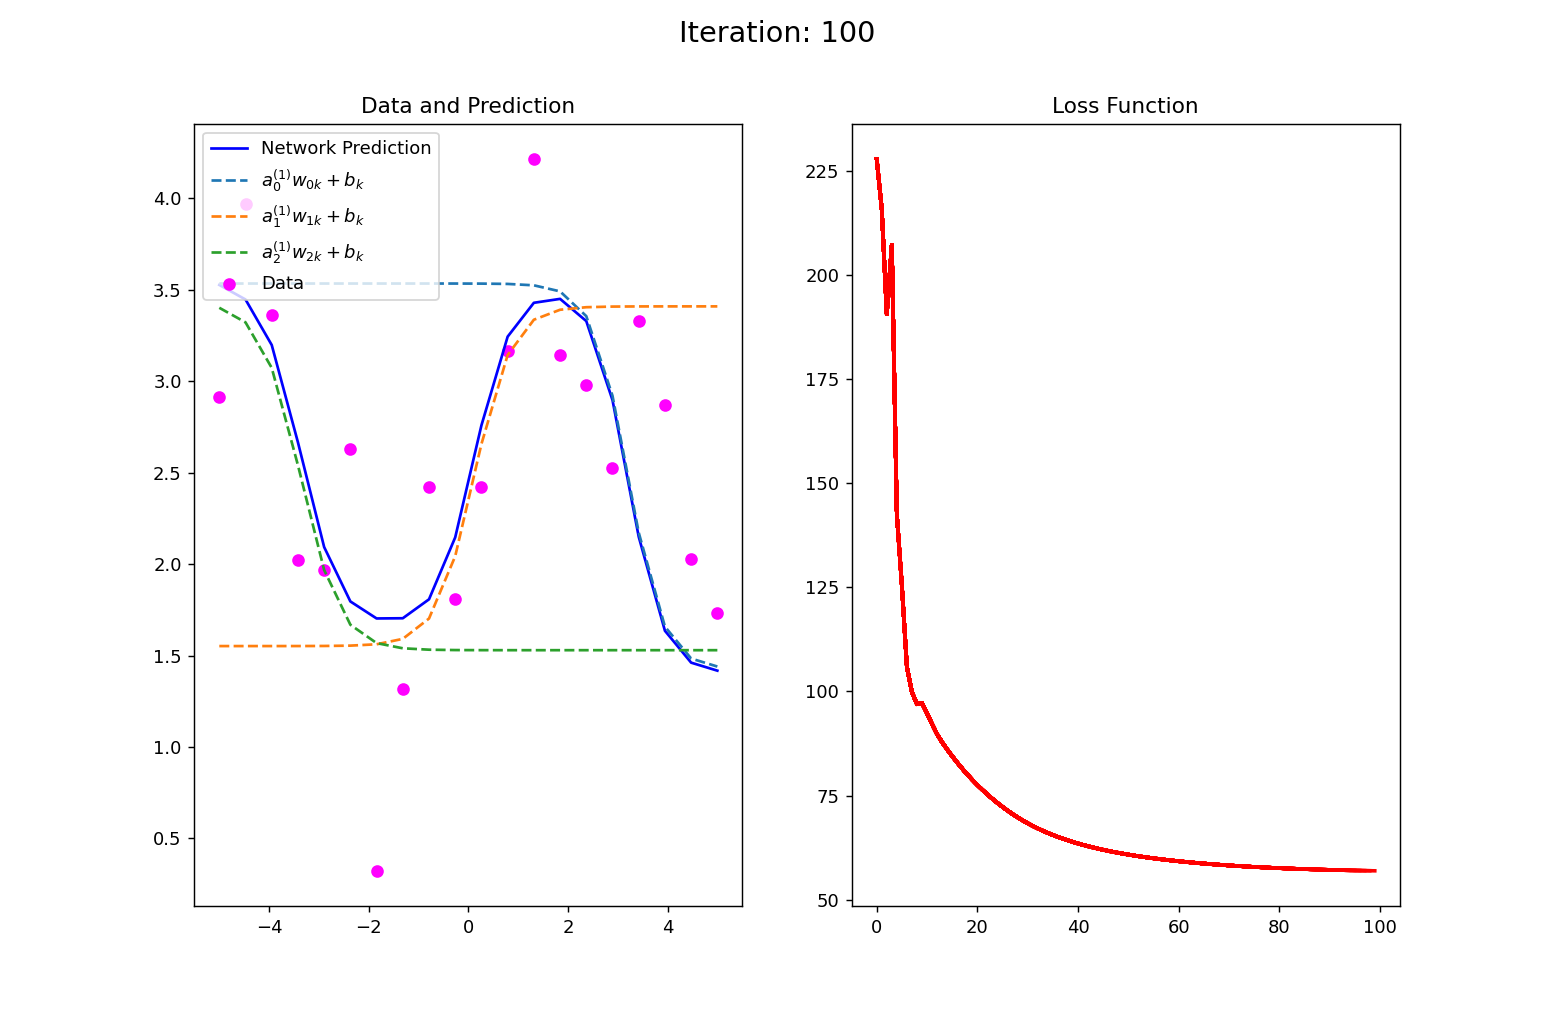

In [71]:
N_HIDDEN_UNITS = 3
PROBLEM_TYPE = 'SIN'
loss_history, prediction_history, weights_history, biases_history = run_ann_simulation(
    problem_type=PROBLEM_TYPE,
    n_hidden_units=N_HIDDEN_UNITS,
    n_observations=200,
    n_iterations=100,
    learning_rate=.2,
)

    
visualize_regression_learning(
    PROBLEM_TYPE,
    loss_history,
    prediction_history,
    weights_history,
    biases_history,
    outfile=f'/tmp/regression-learning-{PROBLEM_TYPE}.gif'.lower()
)